# Play the game

In [1]:
# Let's make sure we have the right library
!pip install pygame

In [2]:
# and that we are in the right kernel
import sys
print(sys.executable)

/anaconda/envs/azureml_py38/bin/python


## Play the game, with user interaction
We will capture the first moment when the ball starts the trip down, and input our movement decision, immediately after the game prints in the user did OK.
Of course, since you can see the beginning, you can always pick the right direction, but enhancing this cell can allow inputting a robot decision. With an 8sec timer

### Let's now clean the images:

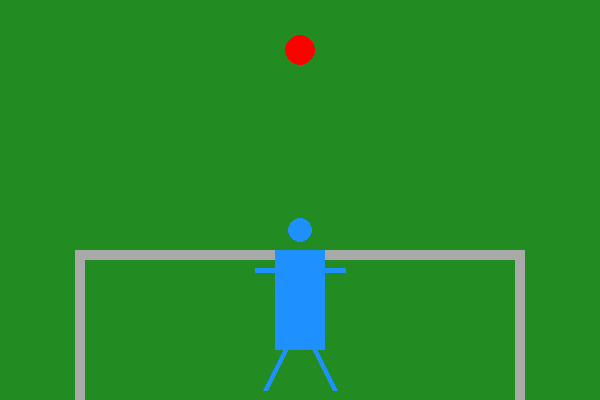


Round 7/20
Current score: 5
You have 8 seconds to make your move!


Move the goalkeeper (left, middle, right):  middle


In [ ]:
import os
import pygame
import random
import threading
import time
from queue import Queue, Empty
from IPython.display import display, Image, clear_output

# Disable sound to avoid issues in non-graphical environments
os.environ["SDL_AUDIODRIVER"] = "dummy"
pygame.mixer.init()

# Initialize Pygame
pygame.init()

# Screen dimensions
WIDTH, HEIGHT = 600, 400
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Goalkeeper Challenge")

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (34, 139, 34)
RED = (255, 0, 0)
BLUE = (30, 144, 255)
GRAY = (169, 169, 169)

# Goalkeeper properties
goalkeeper_width, goalkeeper_height = 50, 100
goalkeeper_y = HEIGHT - goalkeeper_height - 50

# Ball properties
ball_radius = 15
ball_positions = ["left", "middle", "right"]
ball_x_positions = {"left": WIDTH // 4, "middle": WIDTH // 2, "right": 3 * WIDTH // 4}
ball_y_start = 50  # Initial Y position of the ball

# Game variables
running = True
score = 0
num_rounds = 20
current_round = 0

def draw_goal():
    pygame.draw.rect(screen, GRAY, (WIDTH // 8, HEIGHT - 150, WIDTH - WIDTH // 4, 10))  # goal post
    pygame.draw.rect(screen, GRAY, (WIDTH // 8, HEIGHT - 150, 10, 150))  # left post
    pygame.draw.rect(screen, GRAY, (WIDTH - WIDTH // 8 - 10, HEIGHT - 150, 10, 150))  # right post

def draw_goalkeeper(x, y):
    # Draw the head
    pygame.draw.circle(screen, BLUE, (x + goalkeeper_width // 2, y - 20), goalkeeper_width // 4)
    # Draw the body
    pygame.draw.rect(screen, BLUE, (x, y, goalkeeper_width, goalkeeper_height))
    # Draw the arms
    pygame.draw.line(screen, BLUE, (x - 20, y + 20), (x + goalkeeper_width + 20, y + 20), 5)
    # Draw the legs
    pygame.draw.line(screen, BLUE, (x + 10, y + goalkeeper_height), (x - 10, y + goalkeeper_height + 40), 5)
    pygame.draw.line(screen, BLUE, (x + goalkeeper_width - 10, y + goalkeeper_height), (x + goalkeeper_width + 10, y + goalkeeper_height + 40), 5)

def draw_field():
    pygame.draw.rect(screen, GREEN, (0, 0, WIDTH, HEIGHT))  # Green field background

def save_screenshot(round_number):
    filename = f"round_{round_number + 1}.png"
    pygame.image.save(screen, filename)
    return filename

def get_player_input(queue):
    player_input = input("Move the goalkeeper (left, middle, right): ").strip().lower()
    queue.put(player_input)

def run_game():
    global running, current_round, score

    while running and current_round < num_rounds:
        ball_position = random.choice(ball_positions)
        goalkeeper_position = "middle"
        goalkeeper_x = ball_x_positions[goalkeeper_position] - (goalkeeper_width // 2)
        ball_y = ball_y_start  # Initialize the ball's Y position for each round

        # Draw the initial state of the game
        draw_field()
        draw_goal()
        draw_goalkeeper(goalkeeper_x, goalkeeper_y)
        pygame.draw.circle(screen, RED, (ball_x_positions[ball_position], ball_y), ball_radius)
        pygame.display.flip()
        
        # Save a screenshot at the start of the round and display it
        screenshot_path = save_screenshot(current_round)
        clear_output(wait=True)
        display(Image(filename=screenshot_path))
        
        print(f"\nRound {current_round + 1}/{num_rounds}")
        print(f"Current score: {score}")
        print("You have 8 seconds to make your move!")
        
        # Prepare to capture player's input with a timeout
        queue = Queue()
        thread = threading.Thread(target=get_player_input, args=(queue,))
        thread.start()

        # Wait for the player's input or timeout after 8 seconds
        try:
            player_input = queue.get(timeout=8)
        except Empty:
            player_input = "middle"  # Default action if timeout occurs
            print("No input detected. Defaulting to 'middle'.")

        # Ensure valid input
        if player_input not in ["left", "middle", "right"]:
            print("Invalid input! Defaulting to 'middle'.")
            player_input = "middle"

        # Check if goalkeeper catches the ball
        if player_input == ball_position:
            print(f"Goalkeeper moved to {player_input} and caught the ball!")
            score += 1
        else:
            print(f"Goalkeeper moved to {player_input}, but missed the ball! The ball was at {ball_position}.")
        
        # Move to the next round
        current_round += 1
        
        if current_round >= num_rounds:
            running = False

    print(f"\nFinal Score: {score}/{num_rounds}")
    pygame.quit()

# Run the game loop in the current thread
run_game()


In [ ]:
import os
import glob

# Find all PNG files that match the pattern "round_*.png"
png_files = glob.glob("round_*.png")

# Loop through and remove each file
for file in png_files:
    os.remove(file)
    print(f"Deleted {file}")

print("All round screenshots have been removed.")
